In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df= pd.read_csv("IMDB Dataset.csv")

In [48]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Lower Case

In [49]:
df['review']=df['review'].str.lower()

In [50]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


# REMOVE HTML TAGS 

In [51]:
import re

In [52]:
def remove_html_tag(data):
    pattern=re.compile('<.*?>')
    return pattern.sub(r'',data)

In [53]:
df['review']= df['review'].apply(remove_html_tag)

In [54]:
df[['review']]

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."
...,...
49995,i thought this movie did a down right good job...
49996,"bad plot, bad dialogue, bad acting, idiotic di..."
49997,i am a catholic taught in parochial elementary...
49998,i'm going to have to disagree with the previou...


# REMOVE PUNCTUATIONS

In [55]:
import string 

In [56]:
exclude= string.punctuation

In [57]:
def remove_punc1(text):
    return text.translate(str.maketrans('','',exclude))

In [58]:
df['review']= df['review'].apply(remove_punc1)

In [59]:
df[['review']]

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...
3,basically theres a family where a little boy j...
4,petter matteis love in the time of money is a ...
...,...
49995,i thought this movie did a down right good job...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,i am a catholic taught in parochial elementary...
49998,im going to have to disagree with the previous...


# MARKDOWN

In [60]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords 

In [61]:
stop_words = set(stopwords.words('english'))

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [63]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


<AxesSubplot:>

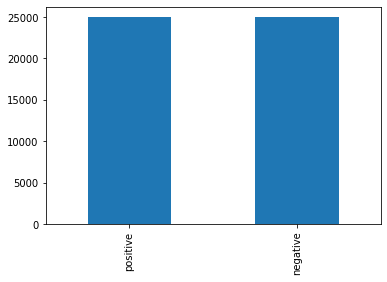

In [64]:
df['sentiment'].value_counts().plot(kind='bar')

In [65]:
for i in range(5):
    print("Review", [i])
    print(df['review'].iloc[i], '\n')
    print("Sentiment", df['sentiment'].iloc[i], "\n\n")

Review [0]
one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pre

In [66]:
def no_of_words(data):
    words=data.split()
    word_count= len(words)
    return word_count

In [67]:
no_of_words(df['review'][0])

301

In [68]:
df['word_count']= df['review'].apply(no_of_words)

In [69]:
df

,review,sentiment,word_count
0,one of the other reviewers has mentioned that ...,positive,301
1,a wonderful little production the filming tech...,positive,156
2,i thought this was a wonderful way to spend ti...,positive,162
3,basically theres a family where a little boy j...,negative,129
4,petter matteis love in the time of money is a ...,positive,222
...,...,...,...
49995,i thought this movie did a down right good job...,positive,190
49996,bad plot bad dialogue bad acting idiotic direc...,negative,108
49997,i am a catholic taught in parochial elementary...,negative,225
49998,im going to have to disagree with the previous...,negative,212


In [70]:
df.sentiment.replace('positive', 1, inplace=True)
df.sentiment.replace('negative', 2, inplace=True)

In [71]:
df

,review,sentiment,word_count
0,one of the other reviewers has mentioned that ...,1,301
1,a wonderful little production the filming tech...,1,156
2,i thought this was a wonderful way to spend ti...,1,162
3,basically theres a family where a little boy j...,2,129
4,petter matteis love in the time of money is a ...,1,222
...,...,...,...
49995,i thought this movie did a down right good job...,1,190
49996,bad plot bad dialogue bad acting idiotic direc...,2,108
49997,i am a catholic taught in parochial elementary...,2,225
49998,im going to have to disagree with the previous...,2,212


In [74]:
def data_processing(text):
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [75]:
df['review']= df['review'].apply(data_processing)

In [76]:
df

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,301
1,wonderful little production filming technique ...,1,156
2,thought wonderful way spend time hot summer we...,1,162
3,basically theres family little boy jake thinks...,2,129
4,petter matteis love time money visually stunni...,1,222
...,...,...,...
49995,thought movie right good job wasnt creative or...,1,190
49996,bad plot bad dialogue bad acting idiotic direc...,2,108
49997,catholic taught parochial elementary schools n...,2,225
49998,im going disagree previous comment side maltin...,2,212


In [78]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  422


In [79]:
df.shape

(50000, 3)

In [81]:
df= df.drop_duplicates('review')

In [82]:
df

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,301
1,wonderful little production filming technique ...,1,156
2,thought wonderful way spend time hot summer we...,1,162
3,basically theres family little boy jake thinks...,2,129
4,petter matteis love time money visually stunni...,1,222
...,...,...,...
49995,thought movie right good job wasnt creative or...,1,190
49996,bad plot bad dialogue bad acting idiotic direc...,2,108
49997,catholic taught parochial elementary schools n...,2,225
49998,im going disagree previous comment side maltin...,2,212


In [83]:
df.shape

(49578, 3)

In [84]:
stemmer= PorterStemmer()
def stemming(data):
    text= [ stemmer.stem(word) for word in data]
    return data

In [85]:
df.review = df['review'].apply(lambda x: stemming(x))

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [86]:
df['word count']= df['review'].apply(no_of_words)

C:\Users\admin\AppData\Local\Temp\ipykernel_5608\1550802705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word count']= df['review'].apply(no_of_words)


In [87]:
df

,review,sentiment,word_count,word count
0,one reviewers mentioned watching 1 oz episode ...,1,301,168
1,wonderful little production filming technique ...,1,156,84
2,thought wonderful way spend time hot summer we...,1,162,86
3,basically theres family little boy jake thinks...,2,129,67
4,petter matteis love time money visually stunni...,1,222,125
...,...,...,...,...
49995,thought movie right good job wasnt creative or...,1,190,85
49996,bad plot bad dialogue bad acting idiotic direc...,2,108,55
49997,catholic taught parochial elementary schools n...,2,225,115
49998,im going disagree previous comment side maltin...,2,212,115


In [88]:
pos_reviews = df[df.sentiment ==1]
pos_reviews.head()

,review,sentiment,word_count,word count
0,one reviewers mentioned watching 1 oz episode ...,1,301,168
1,wonderful little production filming technique ...,1,156,84
2,thought wonderful way spend time hot summer we...,1,162,86
4,petter matteis love time money visually stunni...,1,222,125
5,probably alltime favorite movie story selfless...,1,119,58


In [89]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('film', 39285),
 ('movie', 35831),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12340),
 ('see', 11814),
 ('time', 11725),
 ('well', 10929),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8972)]

In [90]:
pos_words = pd.DataFrame(count.most_common(15))

In [91]:
pos_words

,0,1
0,film,39285
1,movie,35831
2,one,25621
3,like,16998
4,good,14281
5,great,12568
6,story,12340
7,see,11814
8,time,11725
9,well,10929


In [92]:
neg_counts = df[df.sentiment==2]
neg_counts.head()

,review,sentiment,word_count,word count
3,basically theres family little boy jake thinks...,2,129,67
7,show amazing fresh innovative idea 70s first a...,2,170,83
8,encouraged positive comments film looking forw...,2,124,64
10,phil alien one quirky films humour based aroun...,2,88,51
11,saw movie 12 came recall scariest scene big bi...,2,176,84


In [93]:
for text in neg_counts['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('movie', 82831),
 ('film', 73943),
 ('one', 49985),
 ('like', 38505),
 ('good', 28276),
 ('even', 24076),
 ('would', 23802),
 ('time', 23074),
 ('really', 22722),
 ('see', 22226),
 ('story', 21904),
 ('much', 18730),
 ('well', 18303),
 ('get', 18036),
 ('great', 17594)]

In [95]:
neg_words = pd.DataFrame(count.most_common(15))

In [97]:
neg_words

,0,1
0,movie,82831
1,film,73943
2,one,49985
3,like,38505
4,good,28276
5,even,24076
6,would,23802
7,time,23074
8,really,22722
9,see,22226


In [98]:
X= df['review']
y= df['sentiment']

In [99]:
vect = TfidfVectorizer()
X= vect.fit_transform(df['review'])

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

In [104]:
lr= LogisticRegression()

In [106]:
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [107]:
accuracy_score(lr_pred, y_test)

0.8900766438079871